<a href="https://colab.research.google.com/github/403ENDer/Mediscan/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings(action = "ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load and preprocess images
image_dir = "/content/drive/MyDrive/Mediscan/Main_imagess"
image_list = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        filepath = os.path.join(image_dir, filename)
        image = Image.open(filepath).resize((400, 300))
        image_list.append({'Image': image, 'Filename': filename})

df = pd.DataFrame(image_list)
print(df['Image'][0].size)

(400, 300)


In [ ]:
drug_names = []
for filename in df['Filename']:
    drug_names.append(filename.split('_')[0])

In [ ]:
df['drug_name'] = drug_names
encoder = LabelEncoder()
df['drug_name_label'] = encoder.fit_transform(df['drug_name'])
df.head()

,Image,Filename,drug_name,drug_name_label
0,<PIL.Image.Image image mode=RGB size=400x300 a...,Paracetamol_2.jpg,Paracetamol,4
1,<PIL.Image.Image image mode=RGB size=400x300 a...,Paracetamol_1.jpg,Paracetamol,4
2,<PIL.Image.Image image mode=RGB size=400x300 a...,Atorvastatin_2.jpg,Atorvastatin,2
3,<PIL.Image.Image image mode=RGB size=400x300 a...,Amlodipine_2.jpg,Amlodipine,0
4,<PIL.Image.Image image mode=RGB size=400x300 a...,Amoxicillin_2.jpg,Amoxicillin,1


In [ ]:
df.shape

(10, 4)

In [ ]:
df

,Image,Filename,drug_name,drug_name_label
0,<PIL.Image.Image image mode=RGB size=400x300 a...,Paracetamol_2.jpg,Paracetamol,4
1,<PIL.Image.Image image mode=RGB size=400x300 a...,Paracetamol_1.jpg,Paracetamol,4
2,<PIL.Image.Image image mode=RGB size=400x300 a...,Atorvastatin_2.jpg,Atorvastatin,2
3,<PIL.Image.Image image mode=RGB size=400x300 a...,Amlodipine_2.jpg,Amlodipine,0
4,<PIL.Image.Image image mode=RGB size=400x300 a...,Amoxicillin_2.jpg,Amoxicillin,1
5,<PIL.Image.Image image mode=RGB size=400x300 a...,Atorvastatin_1.jpg,Atorvastatin,2
6,<PIL.Image.Image image mode=RGB size=400x300 a...,Amlodipine_1.jpg,Amlodipine,0
7,<PIL.Image.Image image mode=RGB size=400x300 a...,Cetrizine_1.jpg,Cetrizine,3
8,<PIL.Image.Image image mode=RGB size=400x300 a...,Amoxicillin_1.jpg,Amoxicillin,1
9,<PIL.Image.Image image mode=RGB size=400x300 a...,Cetrizine_2.jpg,Cetrizine,3


In [ ]:
df['drug_name'].unique()

array(['Paracetamol', 'Atorvastatin', 'Amlodipine', 'Amoxicillin',
       'Cetrizine'], dtype=object)

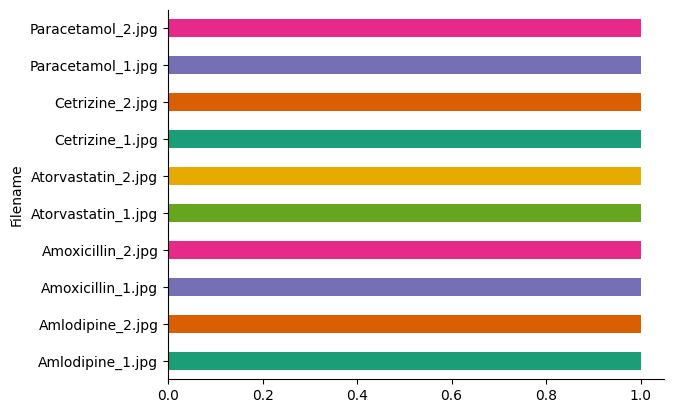

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

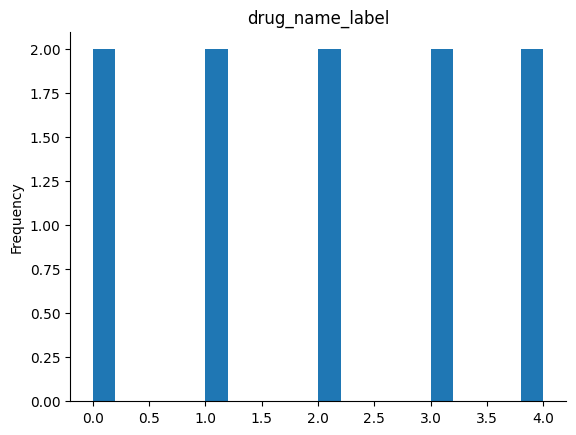

In [ ]:
from matplotlib import pyplot as plt
df['drug_name_label'].plot(kind='hist', bins=20, title='drug_name_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Model fitting and evaluation

In [ ]:
# Convert images to NumPy arrays
image_arrays = []
for image in df['Image']:
    image_array = np.array(image).reshape((600, 600, 1))
    image_arrays.append(image_array)

image_arrays = np.array(image_arrays)
image_arrays = image_arrays.astype('float32') / 255.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_arrays, df['drug_name_label'], test_size=0.2, random_state=42)

In [ ]:
# Create the CNN model
tf.keras.utils.set_random_seed(812)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 600, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Train the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1/1 [==============================] - 12s 12s/step - loss: 1.6008 - accuracy: 0.3750
Epoch 2/6
1/1 [==============================] - 12s 12s/step - loss: 73.3085 - accuracy: 0.2500
Epoch 3/6
1/1 [==============================] - 15s 15s/step - loss: 103.2569 - accuracy: 0.2500
Epoch 4/6
1/1 [==============================] - 8s 8s/step - loss: 52.4927 - accuracy: 0.3750
Epoch 5/6
1/1 [==============================] - 11s 11s/step - loss: 40.1757 - accuracy: 0.2500
Epoch 6/6
1/1 [==============================] - 11s 11s/step - loss: 20.1374 - accuracy: 0.3750


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(image_arrays[y_test], y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 1s 1s/step - loss: 19.2680 - accuracy: 0.5000
Test accuracy: 0.5


In [ ]:
# Make predictions on the test set
y_pred = model.predict(image_arrays[y_test])

1/1 [==============================] - 1s 588ms/step


In [ ]:
# Convert predictions to class labels
y_predic = []
for i in y_pred:
    y_predic.append(list(i).index(max(i)))

In [ ]:
# Evaluate the model's performance
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



# Recommendations

In [ ]:
medicine_data = pd.read_excel("/content/drive/MyDrive/Mediscan/medicine.xlsx")
medicine_data.head()

,name,dosage,usage,side_effects
0,Paracetamol,325-650 mg,Take 1-2 tablets every 4-6 hours for pain/feve...,"liver damage, nausea, vomiting, rash"
1,Cetirizine,5-10 mg,Take 1 tablet daily for allergy relief. Can ca...,"drowsiness, dry mouth, fatigue, stomach pain"
2,Atorvastatin,10-80 mg,Take 1 tablet daily with evening meal to lower...,"muscle pain, liver dysfunction, digestive issu..."
3,Amlodipine,2.5-10 mg,Take 1 tablet daily to lower blood pressure. D...,"swelling, dizziness, flushing, headaches"
4,Amoxicillin,500-875 mg,Take 1 capsule 2-3 times daily for 5-7 days to...,"nausea, diarrhea, abdominal pain, rash"


In [ ]:
image = Image.open("/content/drive/MyDrive/Mediscan/Main_imagess/Atorvastatin_1.jpg")
image.show(image)
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=114x62 at 0x7FAD225A90F0>


In [ ]:
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.image.resize(image, (400, 300))
image = image / 255.0
image_array = np.array(image).reshape((600, 600, 1))
print(image_array.shape)
image_array = tf.expand_dims(image_array, axis=0)

(600, 600, 1)


In [ ]:
result =  model.predict(image_array)
print(result)

1/1 [==============================] - 0s 319ms/step
[[1.4207380e-09 2.0834672e-19 2.7089316e-17 2.6979169e-10 1.0000000e+00]]


In [ ]:
result = np.argmax(result)
drug_dictionary = {0:"Amlodipine" , 1:"Amoxicillin	" , 2:"Atorvastatin" , 3:"Cetirizine" , 4:"Paracetamol"}
predicted_drug = drug_dictionary[result]
print(predicted_drug)

Paracetamol


# Result

In [ ]:
try:
  result = medicine_data.where(medicine_data['name'] == predicted_drug ).dropna()
  print(f"The given drug is {result['name'].values[0]} advised dosage is {result['dosage'].values[0]} ,you need to take  {result['usage'].values[0]}\nPossible side effects are {result['side_effects'].values[0]} so do not use without doctor consolt be safe!")
except :
  print("The predicted drug does not exist in the medicine_data DataFrame")


The given drug is Paracetamol advised dosage is 325-650 mg ,you need to take  Take 1-2 tablets every 4-6 hours for pain/fever relief. Do not exceed 4000 mg per day.
Possible side effects are liver damage, nausea, vomiting, rash so do not use without doctor consolt be safe!
